In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, classification_report, ConfusionMatrixDisplay, roc_curve, auc

Importing data set file

In [ ]:
df=pd.read_csv('/content/Churn_dataset.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='Exited', ylabel='count'>

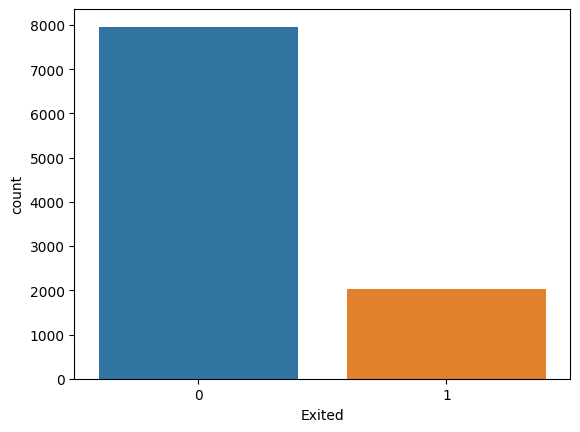

In [ ]:
sns.countplot(x=df.Exited)

<Axes: xlabel='Geography', ylabel='count'>

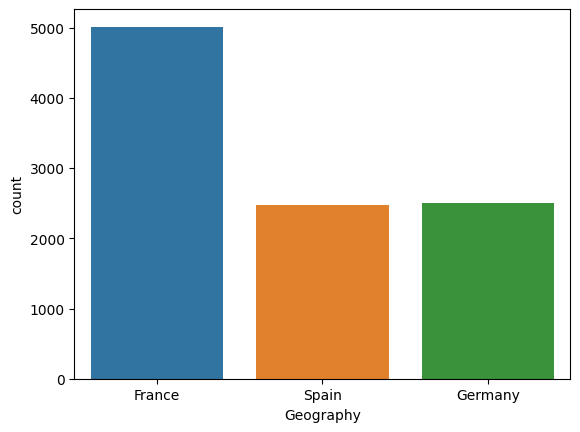

In [ ]:
sns.countplot(x=df.Geography)

<Axes: xlabel='Gender', ylabel='count'>

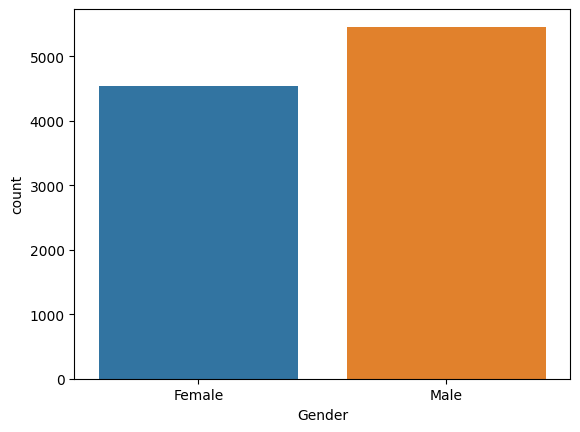

In [ ]:
sns.countplot(x=df.Gender)

<Axes: xlabel='HasCrCard', ylabel='count'>

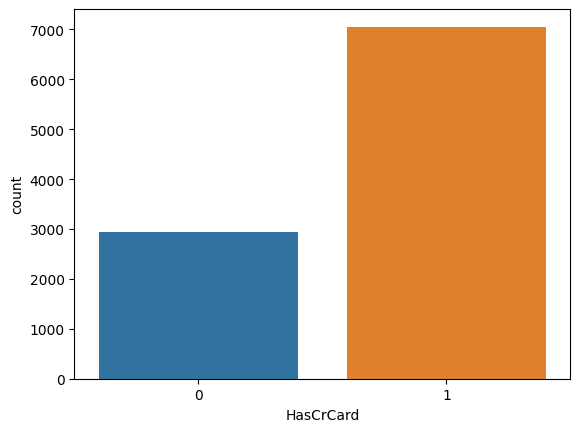

In [ ]:
sns.countplot(x=df.HasCrCard)

<Axes: xlabel='IsActiveMember', ylabel='count'>

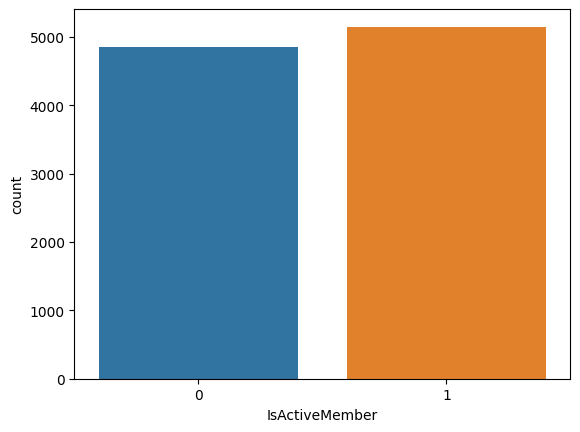

In [ ]:
sns.countplot(x=df.IsActiveMember)

In [ ]:
cat_data=df[['Geography','Gender','HasCrCard','IsActiveMember','Exited']]
cat_data=pd.get_dummies(cat_data)
cat_data.corr()

,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
HasCrCard,1.000000,-0.011866,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,-0.011866,1.000000,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
Exited,-0.007138,-0.156128,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512
Geography_France,0.002467,0.003317,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772
Geography_Germany,0.010577,-0.020486,0.173488,-0.580359,1.000000,-0.332084,0.024628,-0.024628
Geography_Spain,-0.013480,0.016732,-0.052667,-0.575418,-0.332084,1.000000,-0.016889,0.016889
Gender_Female,-0.005766,-0.022544,0.106512,-0.006772,0.024628,-0.016889,1.000000,-1.000000
Gender_Male,0.005766,0.022544,-0.106512,0.006772,-0.024628,0.016889,-1.000000,1.000000


<Axes: >

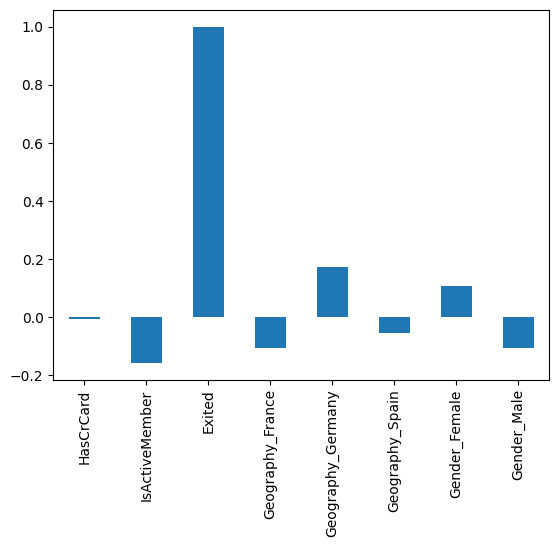

In [ ]:
cat_data.corr()['Exited'].plot(kind='bar',fig=(7,4))

<Axes: >

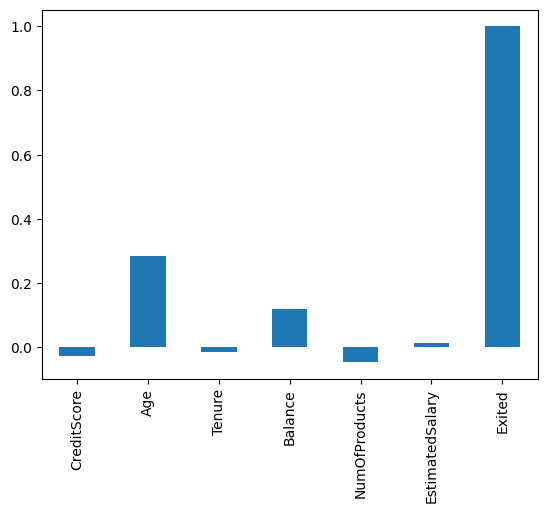

In [ ]:
cat_data=df[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Exited"]]
cat_data.corr()['Exited'].plot(kind='bar',fig=(7,4))

Train Test Split

In [ ]:
X = df.iloc[:, 3:-1]
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<ipython-input-16-961f263319cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, ax=ax)


<Axes: >

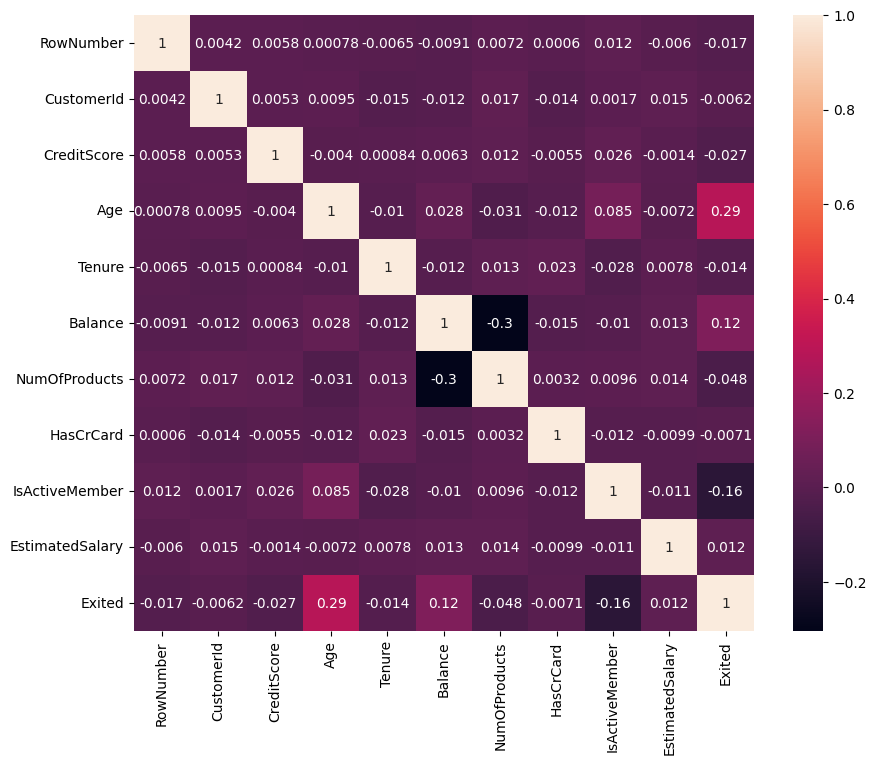

In [ ]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(df.corr(), annot=True, ax=ax)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Using Random Forest Classifier Algorithm

Accuracy: 0.868
Precision: 0.7491166077738516
Recall: 0.5234567901234568


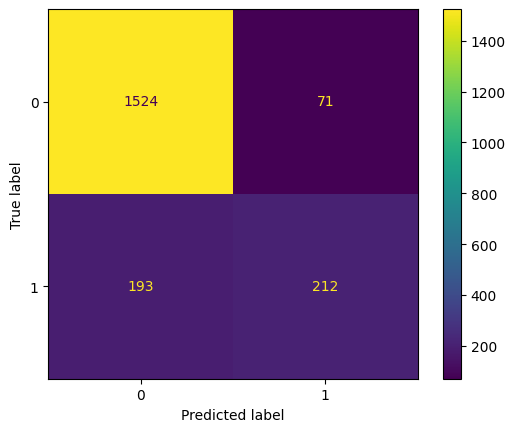

In [ ]:
rf_model=RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y_train)
y_prediction=rf_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_prediction))

precision=precision_score(y_test,y_prediction)
recall=recall_score(y_test,y_prediction)

print("Precision:",precision)
print("Recall:",recall)

#Displaying Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test,y_prediction)
plt.show()

In [ ]:
print(X_train)

[[ 0.16958176 -0.46460796  0.00666099 ... -0.5698444   1.74309049
  -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 ...  1.75486502 -0.57369368
   0.91601335]
 [-1.19119591 -0.94312892 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 ...
 [ 0.9015152  -0.36890377  0.00666099 ... -0.5698444  -0.57369368
   0.91601335]
 [-0.62420521 -0.08179119  1.39076231 ... -0.5698444   1.74309049
  -1.09168714]
 [-0.28401079  0.87525072 -1.37744033 ...  1.75486502 -0.57369368
  -1.09168714]]


In [ ]:
X_train.shape

(8000, 11)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


Customer Churn Prediction based on inputs from user

In [ ]:
n1=int(input('Enter Credit Score'))
n2=int(input('Enter Age'))
n3=int(input('Enter Tenure'))
n4=float(input('Enter Balance'))
n5=int(input('Enter Number of Products'))
n6=int(input('Has Credit Card?'))
n7=int(input('Is Active Member?'))
n8=float(input('Enter Estimated Salary'))
n9=int(input('Are you from Germany?'))
n10=int(input('Are you from Spain?'))
n11=int(input('Are you Male?'))

i=(n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11)

nparray=np.asarray(i)
reshapedArray=nparray.reshape(1,-1)

inputdata=sc.transform(reshapedArray)
y_prediction=rf_model.predict(inputdata)

if y_prediction[0]==0:
  print("Person doesn't exited")
else:
  print("Person Exited")

Enter Credit Score619
Enter Age42
Enter Tenure2
Enter Balance0
Enter Number of Products1
Has Credit Card?1
Is Active Member?1
Enter Estimated Salary101348.9
Are you from Germany?0
Are you from Spain?0
Are you Male?0
Person Exited


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
